In [3]:
# !pip install leafmap

In [911]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
# import cv2
# from PIL import Image
%matplotlib inline
from geopandas import GeoSeries
from shapely.ops import cascaded_union
import leafmap
from shapely.geometry import MultiPoint
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

In [882]:
gdf = gpd.read_file("/work/mapsolution/data-1682398976674.csv")
gdf["geom"] = gpd.GeoSeries.from_wkb(gdf["geom"])
gdf = gdf[["筆id", "市区町村名", "大字名", "丁目名", "geom"]]
gdf["大字_丁目名"] = gdf["大字名"] + gdf["丁目名"]
gdf = gpd.GeoDataFrame(gdf, crs="EPSG:4326", geometry="geom")

In [883]:
gdf.head()

,筆id,市区町村名,大字名,丁目名,geom,大字_丁目名
0,H000002270,港区,新橋,６丁目,"MULTIPOLYGON (((-58.94100 79.57900, -63.70800 ...",新橋６丁目
1,H000000033,港区,愛宕,１丁目,"MULTIPOLYGON (((65.59800 182.31900, 65.64200 1...",愛宕１丁目
2,H000000003,港区,愛宕,１丁目,"MULTIPOLYGON (((85.65600 326.04200, 84.73100 3...",愛宕１丁目
3,H000000086,港区,愛宕,２丁目,"MULTIPOLYGON (((33.97900 103.74700, 33.96700 1...",愛宕２丁目
4,H000000020,港区,愛宕,１丁目,"MULTIPOLYGON (((52.48900 295.11800, 42.04900 2...",愛宕１丁目


In [884]:
gdf["大字_丁目名"].unique()

array(['新橋６丁目', '愛宕１丁目', '愛宕２丁目', '虎ノ門１丁目', '虎ノ門３丁目', '虎ノ門４丁目', '芝１丁目',
       '芝２丁目', '虎ノ門２丁目', '虎ノ門５丁目', '新橋５丁目', '新橋１丁目', '高輪２丁目', '高輪３丁目',
       '芝３丁目', '赤坂２丁目', '三田１丁目', '三田２丁目', '南青山３丁目', '港南２丁目', '赤坂５丁目',
       '高輪４丁目', '赤坂６丁目', '赤坂４丁目', '赤坂８丁目', '高輪１丁目', '東新橋１丁目', '東麻布１丁目',
       '南青山２丁目', '三田３丁目', '三田５丁目', '三田４丁目', '芝４丁目', '港南１丁目', '芝５丁目',
       '芝浦１丁目', '芝浦４丁目', '芝浦２丁目', '西麻布３丁目', '芝浦３丁目', '西麻布１丁目', '芝公園１丁目',
       '芝公園４丁目', '芝公園３丁目', '芝公園２丁目', '南青山４丁目', '新橋４丁目', '西麻布４丁目', '港南３丁目',
       '港南４丁目', '港南５丁目', '南青山６丁目', '新橋２丁目', '新橋３丁目', '西麻布２丁目', '赤坂１丁目',
       '六本木７丁目', '元赤坂１丁目', '元赤坂２丁目', '赤坂３丁目', '南青山５丁目', '南青山７丁目',
       '南麻布４丁目', '南麻布５丁目', '南麻布１丁目', '南麻布２丁目', '南麻布３丁目', '白金１丁目', '白金５丁目',
       '白金６丁目', '北青山１丁目', '赤坂７丁目', '赤坂９丁目', '東新橋２丁目', '東麻布２丁目', '南青山１丁目',
       '東麻布３丁目', '六本木３丁目', '白金２丁目', '白金３丁目', '白金４丁目', '白金台５丁目', '白金台３丁目',
       '北青山２丁目', '浜松町１丁目', '北青山３丁目', '麻布永坂町NULL', '元麻布１丁目', '元麻布２丁目',
       '六本木６丁目', '麻布十番１丁目', '麻布十番２丁目', '海岸１丁目', '麻布十番３丁目', '麻布十番４丁目

In [885]:
tdf = gdf[gdf["大字_丁目名"] == "白金台１丁目"]

<Axes: >

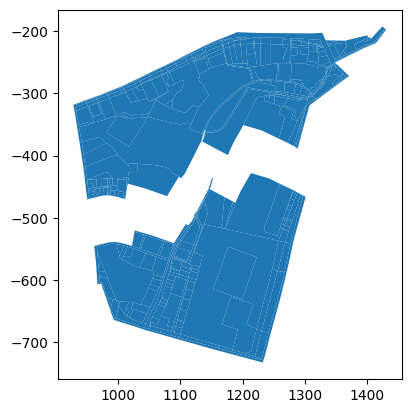

In [886]:
tdf["geom"].plot(aspect=1)

<Axes: >

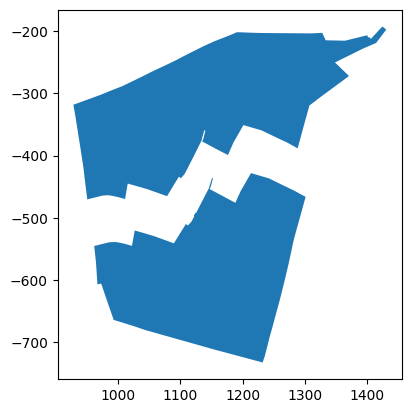

In [899]:
# 境界を取得
bound = gpd.GeoSeries(cascaded_union(tdf.geom))
bound.plot()

In [900]:
bound

0    MULTIPOLYGON (((972.719 -605.827, 966.704 -607...
dtype: geometry

In [901]:
# MultipolygonをPolygonに変換
bdf = gpd.GeoDataFrame({
    "geometry": bound
}, crs=4326)

bdf = bdf.explode(index_parts=False).reset_index(False).reset_index(False)
bdf

,level_0,index,geometry
0,0,0,"POLYGON ((972.71900 -605.82700, 966.70400 -607..."
1,1,0,"POLYGON ((954.11700 -469.57900, 950.43600 -470..."


In [902]:
# 抽出レコードに幾つのポリゴンが含まれているか
Polygon_Num = bdf.shape[0]
print(Polygon_Num)

2


<Axes: >

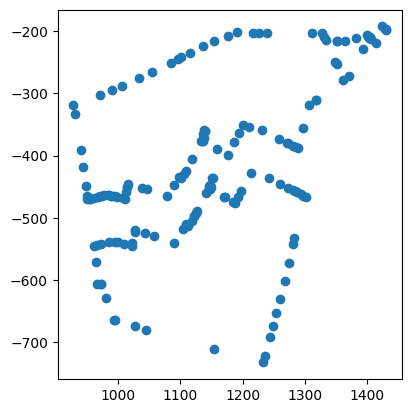

In [903]:
# ポリゴンの外周を取得する
# TODO 点を増やすために線型補完したい
bdf.geometry = bdf.geometry.apply(lambda x: MultiPoint(list(x.exterior.coords)))
bdf.plot(aspect=1)

In [818]:
gdf = bdf.copy()

In [819]:
# 輪郭の点群をDataframeとして取得する
# 終点が追加されて+1行となる
# ポリゴンごとにIDを付与してくれているので、どのポリゴンの点なのか識別できる
ex = gdf.geometry.explode(index_parts=True)

In [820]:
# GeoSeries to pd.DataFrame
df = pd.DataFrame({
    "x":ex.x,
    "y":ex.y
}).reset_index(drop=False)

In [821]:
# 局所方向符号を定義する
# Cn_secがもとまる
cn_list = []
for c in range(df.shape[0] - 1):
    cc = c + 1
    if cc < df.shape[0] - 1:
        fir = df.loc[cc-1,:].values
        sec = df.loc[cc,:].values
        thr = df.loc[cc+1,:].values
    else:
        fir = df.loc[cc-1,:].values
        sec = df.loc[cc,:].values
        thr = df.loc[1,:].values

    v1 = sec - fir
    v2 = thr - sec

    if v2[1] < 0 :
        r = 180
    else:
        r = 0

    n1 = np.linalg.norm(v1, ord=2)
    n2 = np.linalg.norm(v2, ord=2)

    d = np.dot(v1, v2)

    cos = d / (n1 * n2)

    # Cn_secの角度
    theta = np.arccos(cos)
    theta = r + np.degrees(theta)
    print("theta", "Cn", cc, theta)

    # 局所方向符号:cn
    if (0 <= theta < 45):
        cn = 0
    elif (45 <= theta < 90):
        cn = 1
    elif (90 <= theta < 135):
        cn = 2
    elif (135 <= theta < 180):
        cn = 3
    elif (180 <= theta < 225):
        cn = 4
    elif (225 <= theta < 270):
        cn = 5
    elif (270 <= theta < 315):
        cn = 6
    elif (315 <= theta < 360):
        cn = 7

    print("局所方向符号", cn)
    cn_list.append(cn)

theta Cn 1 98.66615033027287
局所方向符号 2
theta Cn 2 2.345533477314576
局所方向符号 0
theta Cn 3 83.7664532268389
局所方向符号 1
theta Cn 4 8.025025950462046
局所方向符号 0
theta Cn 5 3.233323528106757
局所方向符号 0
theta Cn 6 10.233544570185265
局所方向符号 0
theta Cn 7 11.377379882969029
局所方向符号 0
theta Cn 8 5.9440229377203
局所方向符号 0
theta Cn 9 4.217611848118249
局所方向符号 0
theta Cn 10 93.38435515122885
局所方向符号 2
theta Cn 11 8.92435916293845
局所方向符号 0
theta Cn 12 23.229089541114277
局所方向符号 0
theta Cn 13 95.29837952030414
局所方向符号 2
theta Cn 14 0.8101887509923168
局所方向符号 0
theta Cn 15 3.8660009831093616
局所方向符号 0
theta Cn 16 78.1409602053109
局所方向符号 1
theta Cn 17 4.124156379790816
局所方向符号 0
theta Cn 18 94.03631250072927
局所方向符号 2
theta Cn 19 84.7882913815825
局所方向符号 1
theta Cn 20 14.423552624488181
局所方向符号 0
theta Cn 21 58.258330585669604
局所方向符号 1
theta Cn 22 60.884743392948415
局所方向符号 1
theta Cn 23 96.36875571698127
局所方向符号 2
theta Cn 24 92.23864710573216
局所方向符号 2
theta Cn 25 16.29804323215509
局所方向符号 0
theta Cn 26 4.98513931385891
局所方

In [822]:
# 調整
df = df.loc[:df.shape[0] - 2,:]
cn_list.insert(0, cn_list[-1])
cn_list = cn_list[:-1]
df["Cn"] = cn_list

In [823]:
# 局所曲率符号: ca
# Cai = octmod(Cni - Cni-1 + 11) - 3
ca_list = []
for l in range(len(cn_list)):
    # llは1-8をとる　8をとるとout of range
    ll = l + 1
    if ll < len(cn_list):
        ca = ((cn_list[ll-1] - cn_list[ll] + 11 ) % 8 ) - 3
    else:
        ca = ((cn_list[ll-1] - cn_list[0] + 11 ) % 8 ) - 3
    ca_list.append(ca)
df["Ca"] = ca_list

In [824]:
def get_range_list(i, k):
    x = [tmp for tmp in range(df.shape[0])]
    xi = x.index(i)

    fir = xi - k
    sec = xi
    thr = xi + k

    if xi - k <= -1:
        under = df.shape[0] + xi - k
        tun = 0
    else:
        under = xi - k
        tun = 1

    if xi + k + 1 >= df.shape[0]:
        upper = xi + k + 1 - df.shape[0]
        tup = 0
    else:
        upper = xi + k + 1
        tup = 1
    if tun * tup == 1:
        r_l = x[under:upper]
    else:
        r_l = x[under:] + x[:upper]

    return r_l

In [825]:
# G-オペレーション
# M: Mは平滑化に用いる曲線上の連続した画素数
# Gi: 曲線の曲率半径が小さいほど、絶対値が大きくなる。
# 絶対値が大きい部分が曲線の角の部分であると考えられる
# +が左回り, -が右回り

M = 2
k = M - 1
s = 0
gi_list = []
for i in range(df.shape[0]):
    r_l = get_range_list(i, k)
    c = r_l.index(i)

    # CnとCaの値を抽出する
    tmp = df.loc[r_l, :]

    for tk in range(M-1) :
        ca_under = tmp.loc[r_l[c - tk], "Ca"]
        ca_upper = tmp.loc[r_l[c + tk], "Ca"]
        # print(ca_under, ca_upper)
        s = (M - k+1) * (ca_under + ca_upper) + s

    Gi = M * tmp.loc[i, "Ca"]  + s
    gi_list.append(Gi)
df["Gi"] = gi_list

In [826]:
"""
一致判定方法（案）

Q. 近似的な一致に対応できるか
Q.


1. 一方のポリゴンをずらしていいって、Giの二条和誤差が最小となるずらし回数を算出
2. 相互相関係数: 表をlevel_1で昇順・降順で並べた上で比較しないとずれる
3. 相互相関係数　→　類似部分を抽出　→　逆転

"""

'\n一致判定方法（案）\n\nQ. 近似的な一致に対応できるか\nQ.\n\n\n1. 一方のポリゴンをずらしていいって、Giの二条和誤差が最小となるずらし回数を算出\n2. 相互相関係数: 表をlevel_1で昇順・降順で並べた上で比較しないとずれる\n3. 相互相関係数\u3000→\u3000類似部分を抽出\u3000→\u3000逆転\n\n'

## 符号的：直線・角度的アプローチ

In [856]:
tdf = df.copy()

In [857]:
# 座標変換
min_x = tdf["x"].min()
min_y = tdf["y"].min()
tdf["x"] = tdf["x"] - min_x
tdf["y"] = tdf["y"] - min_y


In [864]:
# 特徴量の抽出 pd.DataFrame -> list -> pd.DataFrame(datamart)
# ポリゴンの個数
polygon_num = [i for i in tdf.level_0.unique()]
# 各ポリゴンのPOINT数
point_num = tdf.groupby("level_0").count()
point_num = point_num["level_1"].to_list()
# 角の抽出 # 主要な角の抽出条件は・・Cn>1かつCa>1かつGi>14 corner=0:直線, corner=1:角
conditions = (tdf["Cn"]>=1) & (tdf["Gi"] != 0)
tdf['corner'] = 1
tdf.loc[~conditions, 'corner'] = 0

# 角の抽出　ポリゴンごとに抽出する
# TODO
tdf_0 = tdf.loc[df["level_0"] == 1, :]
# cornerとlineをlevel_1をindexとして利用してlistで管理する
corner_df = tdf_0[tdf_0["corner"] != 0]
corner_df = corner_df.reset_index(drop=False)

# 直近のcorner同士のxy座標から距離を測定
# dfから測定に用いるレコードの組み合わせを抽出　indexを指定する
def leftShiftIndex(arr, n):
    result = arr[n:] + arr[:n]
    return result
list1 = corner_df["index"].to_list()
list2 = leftShiftIndex(list1,1)
line_index_list = []
for i,j in zip(list1, list2):
    line_index_list.append([i,j])

# 距離と傾きを算出 -> corner_dfに結合
diff_list = []
trend_list = []
for k in line_index_list:
    ia = k[0]
    ib = k[1]
    tmp = corner_df[(corner_df["index"] == ia) | (corner_df["index"] == ib)].reset_index(drop=True)
    # 距離を計算
    diff = ((tmp.loc[1,"x"] - tmp.loc[0,"x"])**2 + (tmp.loc[1,"y"] - tmp.loc[0,"y"])**2) ** 1/2
    diff_list.append(diff)
    # 傾きを計算
    trend = ((tmp.loc[0,"y"] - tmp.loc[1,"y"]) / (tmp.loc[0,"x"] - tmp.loc[1,"x"]))
    trend_list.append(trend)
corner_df["diff"] = diff_list
corner_df["trend"] = trend_list

# diffを丸める
from decimal import *

def make_round(d):
    # getcontext().rounding=ROUND_HALF_UP
    # getcontext().prec=1
    # d = float(Decimal(d))
    d = round(d, -3)
    return d

corner_df["diff"] = corner_df["diff"].apply(make_round)
# corner_df["trend"] = corner_df["trend"].apply(make_round)
# corner_df["diff"] = corner_df["diff"] * corner_df["trend"]

In [865]:
# ans_0 = corner_df.copy()
ans_1 = corner_df.copy()

In [866]:
ans_0 = ans_0[ans_0["diff"] != 0]
ans_1 = ans_1.sort_values("index",ascending=False)
ans_1 = ans_1[ans_1["diff"] != 0]

<Axes: >

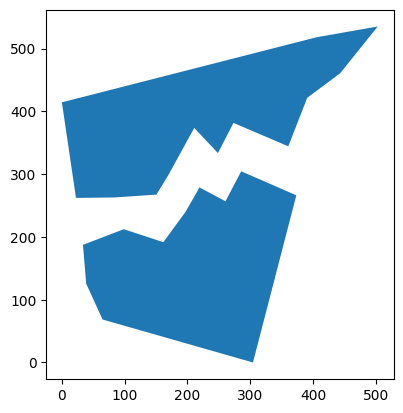

In [867]:
p0 = Polygon(gpd.points_from_xy(ans_0["x"], ans_0["y"]))
p1 = Polygon(gpd.points_from_xy(ans_1["x"], ans_1["y"]))
r_gdf = gpd.GeoDataFrame([p0, p1], geometry=0)
r_gdf.plot()

In [868]:
r_gdf["centroid"] = r_gdf.centroid
distance = r_gdf.loc[0,"centroid"].distance(r_gdf.loc[1,"centroid"])
distance

251.53164325361948

In [869]:
ans_0

,index,level_0,level_1,x,y,Cn,Ca,Gi,corner,diff,trend
1,1,0,1,38.705,125.543,2,2,24,1,2000.0,-12.036590
2,3,0,3,33.567,187.387,1,1,22,1,2000.0,0.001949
4,13,0,13,98.606,212.271,2,2,24,1,2000.0,-0.328191
5,16,0,16,161.618,191.591,1,1,22,1,1000.0,1.601247
11,24,0,24,197.220,240.313,2,2,24,1,2000.0,2.191541
15,34,0,34,219.170,278.813,1,1,22,1,1000.0,-0.533130
16,38,0,38,260.537,256.759,2,2,24,1,1000.0,1.905018
17,41,0,41,285.605,304.514,1,1,22,1,5000.0,-0.435340
18,50,0,50,373.426,266.282,1,1,22,1,38000.0,3.854969
19,60,0,60,304.351,0.000,1,1,22,1,31000.0,-0.285687


In [870]:
ans_1

,index,level_0,level_1,x,y,Cn,Ca,Gi,corner,diff,trend
27,153,1,85,83.168,262.834,2,2,56,1,2000.0,-0.005714
23,146,1,78,150.618,267.412,1,1,54,1,2000.0,-0.320057
22,144,1,76,169.713,298.744,2,2,56,1,1000.0,1.640848
20,137,1,69,210.799,373.600,2,2,56,1,4000.0,2.038508
17,130,1,62,248.545,333.569,2,2,56,1,1000.0,-0.526986
16,127,1,59,273.320,381.618,1,1,54,1,1000.0,1.939415
15,119,1,51,360.613,344.309,2,2,56,1,5000.0,-0.427400
14,116,1,48,390.802,421.589,1,1,54,1,3000.0,2.559873
12,113,1,45,443.141,460.607,2,2,56,1,2000.0,0.737808
10,107,1,39,503.104,535.201,1,1,54,1,5000.0,0.640353


## 最小二乗法

In [871]:
a0_df = ans_0.copy()
a1_df = ans_1.copy()
a0_diff_list = a0_df["diff"]
a1_diff_list = a1_df["diff"]
a0_trend_list = a0_df["trend"]
a1_trend_list = a1_df["trend"]

In [872]:
def calculate_shifted_lse(arr1, arr2):
    min_error = np.inf
    best_shift = None

    # 配列1をずらしながら最小二乗誤差を計算
    for shift in range(len(arr1)):
        shifted_arr1 = np.roll(arr1, shift)
        error = np.sum((shifted_arr1[:len(arr2)] - arr2) ** 2)

        if error < min_error:
            min_error = error
            best_shift = shift

    return min_error, best_shift

# サンプルの配列を作成
# len(arr2) > len(arr1)
if len(a0_diff_list) >= len(a1_diff_list):
    arr1_diff = a0_diff_list
    arr2_diff = a1_diff_list
    arr1_trend = a0_trend_list
    arr2_trend = a1_trend_list
else:
    arr1_diff = a1_diff_list
    arr2_diff = a0_diff_list
    arr1_trend = a1_trend_list
    arr2_trend = a0_trend_list

# ずらしながら最小二乗誤差を計算
error_diff, shift_diff = calculate_shifted_lse(arr1_diff, arr2_diff)
error_trend, shift_trend = calculate_shifted_lse(arr1_trend, arr2_trend)
print(f"最小二乗誤差: {error_diff}")
print(f"最適なずらし: {shift_diff}") # OK
print(f"最小二乗誤差: {error_trend}")
print(f"最適なずらし: {shift_trend}") # OK
ss_list = [shift_diff, shift_trend]
shift = shift_diff

最小二乗誤差: 2003000000.0
最適なずらし: 0
最小二乗誤差: 42.91200494039253
最適なずらし: 1


In [873]:
ss_list

[0, 1]

In [874]:
a0_df

,index,level_0,level_1,x,y,Cn,Ca,Gi,corner,diff,trend
1,1,0,1,38.705,125.543,2,2,24,1,2000.0,-12.036590
2,3,0,3,33.567,187.387,1,1,22,1,2000.0,0.001949
4,13,0,13,98.606,212.271,2,2,24,1,2000.0,-0.328191
5,16,0,16,161.618,191.591,1,1,22,1,1000.0,1.601247
11,24,0,24,197.220,240.313,2,2,24,1,2000.0,2.191541
15,34,0,34,219.170,278.813,1,1,22,1,1000.0,-0.533130
16,38,0,38,260.537,256.759,2,2,24,1,1000.0,1.905018
17,41,0,41,285.605,304.514,1,1,22,1,5000.0,-0.435340
18,50,0,50,373.426,266.282,1,1,22,1,38000.0,3.854969
19,60,0,60,304.351,0.000,1,1,22,1,31000.0,-0.285687


In [875]:
a1_df

,index,level_0,level_1,x,y,Cn,Ca,Gi,corner,diff,trend
27,153,1,85,83.168,262.834,2,2,56,1,2000.0,-0.005714
23,146,1,78,150.618,267.412,1,1,54,1,2000.0,-0.320057
22,144,1,76,169.713,298.744,2,2,56,1,1000.0,1.640848
20,137,1,69,210.799,373.600,2,2,56,1,4000.0,2.038508
17,130,1,62,248.545,333.569,2,2,56,1,1000.0,-0.526986
16,127,1,59,273.320,381.618,1,1,54,1,1000.0,1.939415
15,119,1,51,360.613,344.309,2,2,56,1,5000.0,-0.427400
14,116,1,48,390.802,421.589,1,1,54,1,3000.0,2.559873
12,113,1,45,443.141,460.607,2,2,56,1,2000.0,0.737808
10,107,1,39,503.104,535.201,1,1,54,1,5000.0,0.640353


In [891]:
l0 = a0_df[["level_0", "level_1", "x", "y", "Gi"]].reset_index(drop=True)
l1 = a1_df[["level_0", "level_1", "x", "y", "Gi"]].sort_values('level_1', ascending=False).reset_index(
    drop=True).reset_index(drop=False)

# アンサンブルのために複数の候補を試す
dd_list = []
diff_x_list = []
diff_y_list = []
for shift in ss_list:
    shift_list = [shift, shift+1, shift+2, shift+3, shift+5]
    for diff_index in shift_list:
        # シフトを標準から±いくつかを試す。
        if diff_index >= l1.shape[0]:
            diff_index = diff_index - l1.shape[0]

        l0_x = l0.loc[1, "x"]
        l0_y = l0.loc[1, "y"]
        l1_x = l1.loc[diff_index, "x"]
        l1_y = l1.loc[diff_index, "y"]
        print(l0_x, l0_y, l1_x, l1_y)
        diff_x = l0_x - l1_x
        diff_y = l0_y - l1_y
        diff_x_list.append(diff_x)
        diff_y_list.append(diff_y)
        # 移動距離（判定に使う）
        dd = ((diff_x)**2 + (diff_y)**2) ** 1/2
        dd_list.append(dd)
min_index = dd_list.index(min(dd_list))
diff_x = diff_x_list[min_index]
diff_y = diff_y_list[min_index]

# dd > distanceの場合、処理をやめる
if dd_list[min_index] > distance:
    print("warning")

# l1にdiffを加算する
a1_df["x"] = a1_df["x"] + diff_x
a1_df["y"] = a1_df["y"] + diff_y

ll0 = a0_df[["level_0", "x","y"]]
ll1 = a1_df[["level_0", "x", "y"]]

p1 = Polygon(gpd.points_from_xy(ll0["x"], ll0["y"]))
p2 = Polygon(gpd.points_from_xy(ll1["x"], ll1["y"]))
r_gdf = gpd.GeoDataFrame({"geom":[p1,p2]}, geometry="geom")
r_gdf = r_gdf.reset_index(drop=False)

33.56700000000001 187.38700000000006 33.56700000000001 187.38700000000006
33.56700000000001 187.38700000000006 101.01699999999994 191.96500000000003
33.56700000000001 187.38700000000006 120.11199999999997 223.29700000000003
33.56700000000001 187.38700000000006 161.19799999999998 298.153
33.56700000000001 187.38700000000006 223.71899999999994 306.17100000000005
33.56700000000001 187.38700000000006 101.01699999999994 191.96500000000003
33.56700000000001 187.38700000000006 120.11199999999997 223.29700000000003
33.56700000000001 187.38700000000006 161.19799999999998 298.153
33.56700000000001 187.38700000000006 198.94400000000007 258.122
33.56700000000001 187.38700000000006 311.01200000000006 268.862


In [892]:
min_index

0

In [893]:
dd_list[min_index]

0.0

In [907]:
r_gdf["convex_hull"] = r_gdf.convex_hull
r_gdf = r_gdf.set_geometry("convex_hull")

<Axes: >

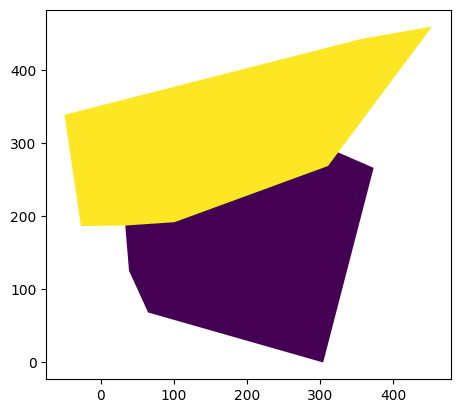

In [908]:
r_gdf.plot("index")

In [915]:
r_gdf["convex_hull"].values

<GeometryArray>
[<POLYGON ((304.351 0, 64.841 68.425, 38.705 125.543, 33.567 187.387, 219.17 ...>, <POLYGON ((-27.164 186.708, -49.601 338.944, 356.112 442.575, 453.503 459.75...>]
Length: 2, dtype: geometry

In [930]:
# PolygonをMultiPolygonに変換
multipolygon = MultiPolygon(r_gdf["convex_hull"].values)
mr_gdf = gpd.GeoDataFrame({"geom":[multipolygon]})
mr_gdf

,geom
0,"MULTIPOLYGON (((304.3509999999999 0, 64.841000..."


<Axes: >

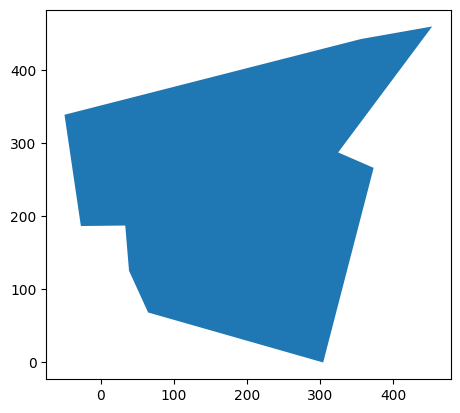

In [932]:
# 境界を取得
bound3 = gpd.GeoSeries(cascaded_union(mr_gdf.geom))
bound3.plot()

In [933]:
bound3

0    POLYGON ((64.841 68.425, 38.705 125.543, 33.56...
dtype: geometry

<Axes: >

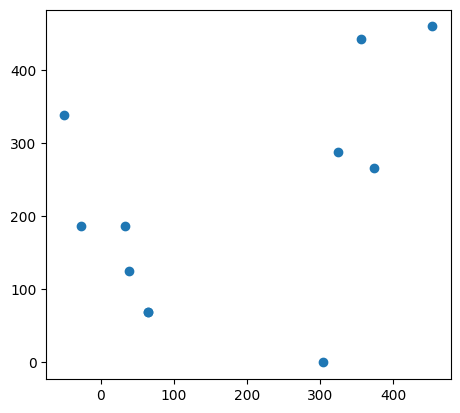

In [936]:
# ポリゴンの外周を取得する
# TODO 点を増やすために線型補完したい
bound3 = bound3.geometry.apply(lambda x: MultiPoint(list(x.exterior.coords)))
bound3.plot(aspect=1)

In [937]:
bound3

0    MULTIPOINT (64.841 68.425, 38.705 125.543, 33....
dtype: geometry

## 相互相関をとってみる

In [ ]:
# data1

In [ ]:
# data2

In [ ]:
# # 二つの時系列データの相互相関係数を算出
# data1 = ans_0.loc[:,"diff"]
# data2 = ans_1.loc[:,"diff"]
# # クロス相関関数の計算
# cross_corr = np.correlate(data1, data2, mode='full')
# # クロス相関関数のプロット
# import plotly.express as px
# fig = px.line(cross_corr)
# fig.show()

In [ ]:
# # cross_corr = cross_corr[:ans_0.shape[0]]
# indices = np.argwhere(cross_corr == cross_corr.max())
# # diff_index = indices[0][0] -2  # ラグdiff_indexで最も相互相関係数が上昇する→diff_indexシフトすると輪郭の一致する部分が重なる。
# diff_index =  0
# print(diff_index)

In [ ]:
# """
# 相互相関係数が最大値の19 - 2だけ移動すると一致する。
# """
# l0 = ans_0[["level_0", "level_1", "x", "y", "diff"]]
# l1 = ans_1[["level_0", "level_1", "x", "y", "diff"]].sort_values('level_1', ascending=False).reset_index(
#     drop=True).reset_index(drop=False)
# diff_index
# l0_x = l0.loc[0, "x"]
# l0_y = l0.loc[0, "y"]
# l1_x = l1.loc[diff_index, "x"]
# l1_y = l1.loc[diff_index, "y"]
#
# print(l0_x, l0_y, l1_x, l1_y)
# diff_x = l0_x - l1_x
# diff_y = l0_y - l1_y
#
# # l1にdiffを加算する
# ans_1["x"] = ans_1["x"] + diff_x
# ans_1["y"] = ans_1["y"] + diff_y
#
# ll0 = ans_0[["level_0", "x","y"]]
# ll1 = ans_1[["level_0", "x", "y"]]
#
# p1 = Polygon(gpd.points_from_xy(ll0["x"], ll0["y"]))
# p2 = Polygon(gpd.points_from_xy(ll1["x"], ll1["y"]))
# r_gdf = gpd.GeoDataFrame([p1,p2], geometry=0)
# r_gdf